In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000115 (2).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000115 (5).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000112.png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000118 (5).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000117 (4).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000114 (6).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000117 (6).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000114 (4).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000118 (4).png
/kaggle/input/chest-cts

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import torch
from fastai import *
from fastai.basics import *
from fastai.callback.all import *
from fastai.metrics import error_rate, accuracy
from fastai.vision import *
from fastai.vision.all import *
import numpy as np
import pandas as pd
import matplotlib as plt

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
path = Path('../input/chest-ctscan-images/Data/train')
path.ls()

(#4) [Path('../input/chest-ctscan-images/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'),Path('../input/chest-ctscan-images/Data/train/normal'),Path('../input/chest-ctscan-images/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'),Path('../input/chest-ctscan-images/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib')]

In [7]:
bs = 64 #Batch Size 64
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224), bs=bs) #Validation percentage 20%

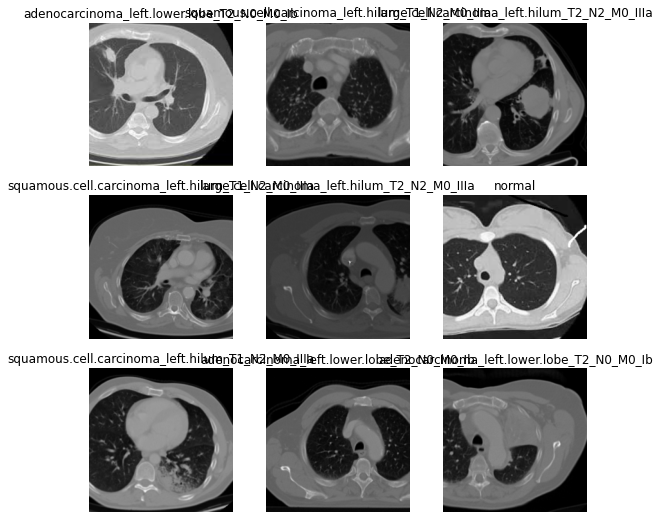

In [8]:
dls.show_batch()

In [14]:
learn = cnn_learner(dls, resnet50, model_dir="/tmp/model/",metrics=accuracy) #Download and use Resnet50

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [15]:
learn.fit_one_cycle(50, 1e-3) #Epochs and Learning Rate

epoch,train_loss,valid_loss,accuracy,time
0,2.253535,1.878395,0.319672,00:09
1,1.994781,1.362815,0.426230,00:09
2,1.798133,1.145111,0.565574,00:09
3,1.585803,1.028476,0.622951,00:09
4,1.368650,0.917823,0.647541,00:09
5,1.176891,0.803166,0.680328,00:09
6,1.021233,0.599941,0.745902,00:09
7,0.885940,0.429623,0.803279,00:09
8,0.779416,0.430162,0.827869,00:10
9,0.687779,0.478029,0.852459,00:09


In [13]:
dir(models)

['ResNet',
 'SqueezeNet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'alexnet',
 'all',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'squeezenet1_0',
 'squeezenet1_1',
 'tvm',
 'unet',
 'vgg11_bn',
 'vgg13_bn',
 'vgg16_bn',
 'vgg19_bn',
 'xresnet']

In [16]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 256 x 56 x 56  
Conv2d                                    16384      False     
BatchNorm2d                        

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

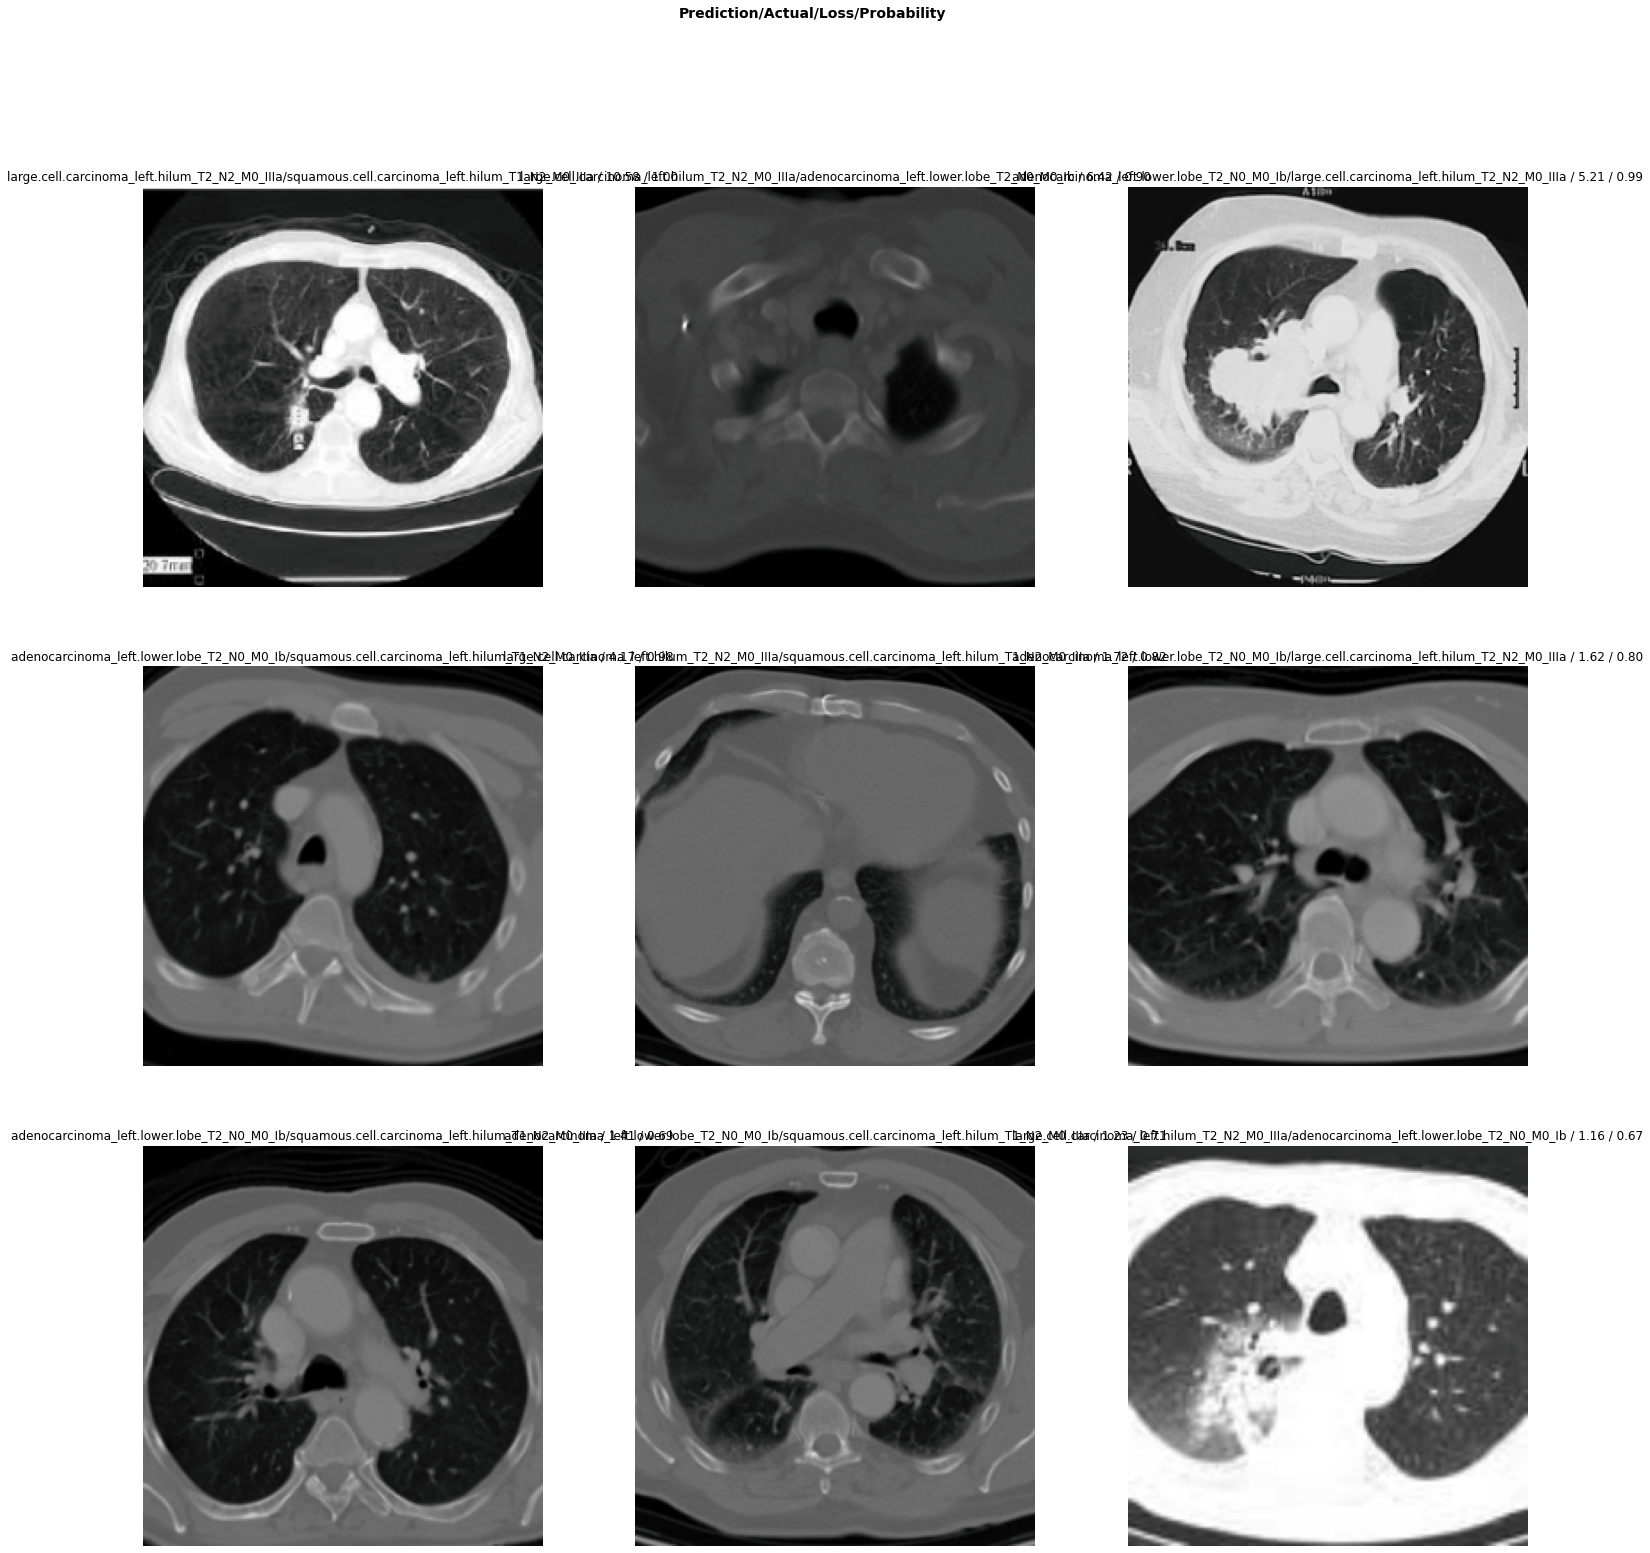

In [21]:
interp.plot_top_losses(9, figsize=(25,25))

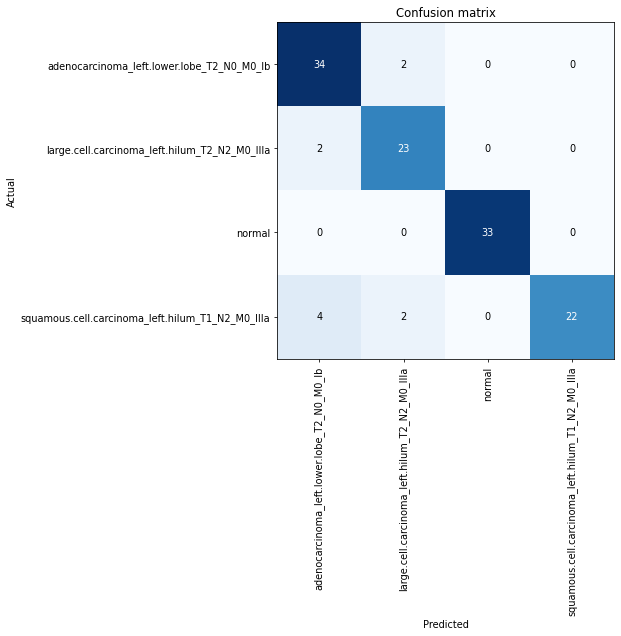

In [26]:
interp.plot_confusion_matrix(figsize=(9,9), dpi=70)